In [1]:
import os
os.chdir("../../../")

In [2]:
import torch
from torchts.nn.models.ode import ODESolver
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [5]:
# Duffing equation: Second order ODE system
dt = 0.01

def x_prime(prev_val, coeffs):
    return torch.cos(coeffs["w"]*prev_val["t"])

def t_prime(prev_val, coeffs):
    return 1

ode = {"x": x_prime, "t": t_prime}

# Initial conditions [0,0,0]
ode_init = {"x": 0, "t": 0}

# Constants (Parameters)
ode_coeffs = {"w": 5.}


# 4th Order Runge-Kutta - Data Generation for nt = 1000

In [6]:
ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=None
)

result = ode_solver(1000)

In [7]:
result

tensor([[ 0.0000,  0.0000],
        [ 0.0100,  0.0100],
        [ 0.0200,  0.0200],
        ...,
        [-0.0806,  9.9701],
        [-0.0713,  9.9801],
        [-0.0619,  9.9901]], grad_fn=<StackBackward>)

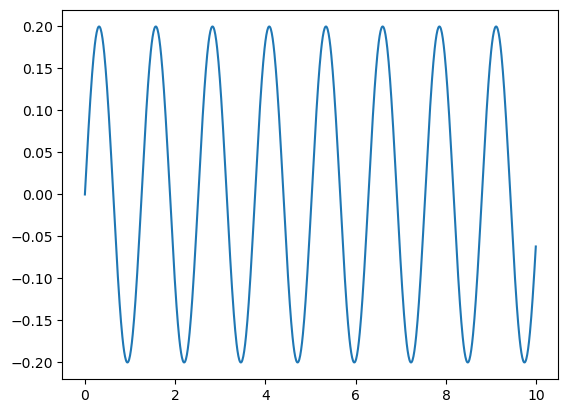

In [9]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(result_np[:,1], result_np[:,0])

plt.show()

# Euler's method for training

In [12]:
ode_train_coeffs = {"w": 1.}

ode_solver_train = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

In [15]:
ode_solver_train.fit_random_sample(
    result,torch.optim.Adam,
    {"lr": 0.5},
    max_epochs=10
)

Epoch: 0	 Loss: tensor(0.0001, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(1.5049, requires_grad=True)}
Epoch: 1	 Loss: tensor(1.9310e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(1.2897, requires_grad=True)}
Epoch: 2	 Loss: tensor(3.4833e-06, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(0.8742, requires_grad=True)}
Epoch: 3	 Loss: tensor(0.0002, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(1.6155, requires_grad=True)}
Epoch: 4	 Loss: tensor(2.6926e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(2.2879, requires_grad=True)}
Epoch: 5	 Loss: tensor(1.4539e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(2.0547, requires_grad=True)}
Epoch: 6	 Loss: tensor(2.4550e-07, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(1.0661, requires_grad=True)}
Epoch: 7	 Loss: tensor(9.2919e-06, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(1.2288, requires_grad=True)}


In [16]:
ode_solver_train.coeffs

{'w': Parameter containing:
 tensor(2.4368, requires_grad=True)}

# Predictions for nt = 1000

In [19]:
results_test = ode_solver_train(1000)
results_test

tensor([[ 0.0000,  0.0000],
        [ 0.0100,  0.0100],
        [ 0.0200,  0.0200],
        ...,
        [-0.3032,  9.9701],
        [-0.2965,  9.9801],
        [-0.2896,  9.9901]], grad_fn=<StackBackward>)

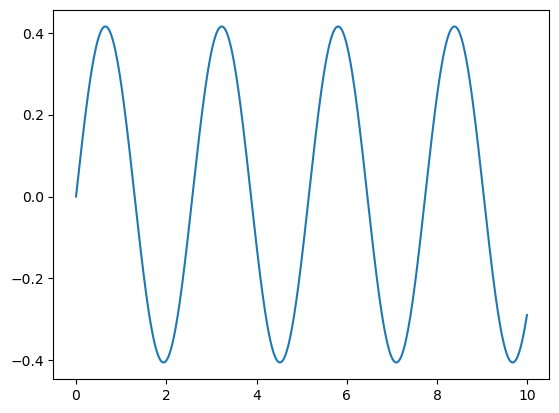

In [20]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,1], results_test_np[:,0])

plt.show()

In [21]:
import scipy.io

scipy.io.savemat("Duffing_fitRandomSample.mat", {"x": results_test_np})